<a href="https://colab.research.google.com/github/ju-ki/free_python/blob/master/Select_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

# 自動特徴量選択
### 単変量統計
* 個々の特徴量とターゲットの間に顕著な関係があるかどうかを計算する。（分散分析ANOVA）

In [3]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(f'X_train.shape: {X_train.shape}')
print(f'X_train_selected.shape: {X_train_selected.shape}')

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

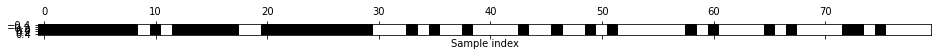

In [5]:
import matplotlib.pyplot as plt
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [8]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'Score with all features: {lr.score(X_test, y_test)}')
lr.fit(X_train_selected, y_train)
print(f'Score with only selected features: {lr.score(X_test_selected, y_test)}')

Score with all features: 0.9157894736842105
Score with only selected features: 0.9192982456140351


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### モデルベース特徴量選択
* 教師あり学習モデルを用いて個々の特徴量の重要性を判断し、重要なものだけ残す

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [11]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")

In [12]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f'X_train.shape: {X_train.shape}')
print(f'X_train_l1.shape: {X_train_l1.shape}')

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


In [13]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f'Test Score :{score}')

Test Score :0.9403508771929825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 反復特徴量選択
* 全く特徴量を使わないところからある基準が満たされるところまで特徴量を加えていく手法
* 全ての特徴量から一つずつ特徴量を取り除いていく方法

In [15]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select=40)
select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f'Test Score: {score}')
print(f"Test Score: {select.score(X_test, y_test)}")

Test Score: 0.9368421052631579
Test Score: 0.9438596491228071


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
